In [1]:
import json

In [2]:
f = open("./data/annotations.json")
data = json.load(f)
f.close()

In [3]:
data.keys()

dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])

In [4]:
for k in data:
    try:
        print(k, end='[0]:\t')
        print(list(data[k][0].keys()), end="")
    except:
        pass
    print()

info[0]:	
images[0]:	['id', 'width', 'height', 'file_name', 'license', 'flickr_url', 'coco_url', 'date_captured', 'flickr_640_url']
annotations[0]:	['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox', 'iscrowd']
scene_annotations[0]:	['image_id', 'background_ids']
licenses[0]:	
categories[0]:	['supercategory', 'id', 'name']
scene_categories[0]:	['id', 'name']


In [5]:
print(data['images'][0]['file_name'])

batch_1/000006.jpg


In [6]:
idFn = {}

for d in data['images']:
    idFn[d['id']] = d['file_name']

In [7]:
k = [d['image_id'] for d in data['annotations']]
len(list(set(k)))

1500

In [8]:
"""
annotations['bbox']
images['id'] == annotations['image_id']
images['file_name']

"""

"\nannotations['bbox']\nimages['id'] == annotations['image_id']\nimages['file_name']\n\n"

In [9]:
len(data['annotations'])

4784

In [10]:
imgAnn = {}

for a in data['annotations']:
    try:
        imgAnn[a['image_id']].append({'bbox':a['bbox'], 'category':a['category_id']})
    except:
        imgAnn[a['image_id']] = [{'bbox':a['bbox'], 'category':a['category_id']}]

In [11]:
imgAnn2 = {}

for k in imgAnn:
    imgAnn2[idFn[k]] = imgAnn[k]

In [12]:
import numpy

x = [len(imgAnn2[k]) for k in imgAnn2]
x = numpy.quantile(x, [0,0.25,0.5,0.75,1]) 
x

array([ 1.,  1.,  2.,  3., 90.])

In [13]:
print("Num Bboxes:",x[-2])

Num Bboxes: 3.0


In [37]:
len(imgAnn2)

1500

In [38]:
num_classes = 60
num_anchors = 1
num_grids = 7
image_input_size = (224,224,3)

In [39]:
import os
imgFolders = ["./data/"+k for k in os.listdir("./data") if "batch_" in k]

In [40]:
imgFile = "./data/batch_1/000000.jpg"
bboxes = [k['bbox'] for k in imgAnn2["batch_1/000000.jpg"]]

In [41]:
import cv2
from matplotlib import pyplot as plt

def scaleImgBbox(imgFile, bbox, output_shape):
    image = cv2.imread(imgFile)
    x_scale = output_shape[0]/image.shape[0]
    y_scale = output_shape[1]/image.shape[1]

    c1 = int(bbox[0] * y_scale)
    c2 = int(bbox[1] * x_scale)
    c3 = int(bbox[2] * y_scale)
    c4 = int(bbox[3] * x_scale) 
    newBbox = [c1,c2,c3,c4]
    
    return newBbox

def drawBoundingBox(fname, output_shape=None, showGrid=False):
    imgFile = "./data/"+fname
    bboxes = [k['bbox'] for k in imgAnn2[fname]]

    image = cv2.imread(imgFile)

    if output_shape is not None:
        image = cv2.resize(image, output_shape)
        newbboxes = []
        for bbox in bboxes:
            newbboxes.append(scaleImgBbox(imgFile, bbox, output_shape))
        bboxes = newbboxes

    for bbox in bboxes:
        start_point = (int(bbox[0]), int(bbox[1]))
        end_point = (int(bbox[0])+int(bbox[2]), int(bbox[1])+int(bbox[3]))
        color = (255, 0, 0)
        thickness = 2

        cx = int(bbox[0] + (bbox[2]/2))
        cy = int(bbox[1] + (bbox[3]/2))
        
        image = cv2.rectangle(image, start_point, end_point, color, thickness)
        image = cv2.circle(image, (cx,cy), 3, color, thickness)

    if showGrid:
        for i in range(num_grids):
            sp = (int(i*image_input_size[0]/num_grids),0)
            ep = (int(i*image_input_size[0]/num_grids),image_input_size[0])
            image = cv2.line(image, sp, ep, (0, 255, 0), thickness) 

            sp = (0,int(i*image_input_size[0]/num_grids))
            ep = (image_input_size[0],int(i*image_input_size[0]/num_grids))
            image = cv2.line(image, sp, ep, (0, 255, 0), thickness) 


    plt.imshow(image)
    plt.show()

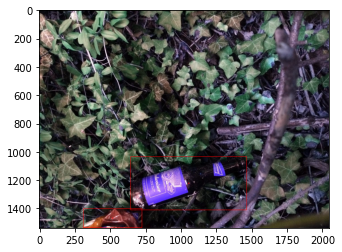

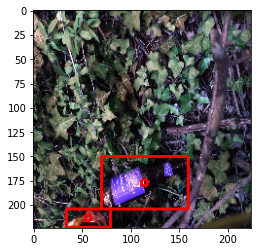

In [42]:
fname = "batch_1/000022.jpg"
output_shape = (image_input_size[0],image_input_size[1])

drawBoundingBox(fname)
drawBoundingBox(fname, output_shape)

In [43]:
c = 0
for k in imgAnn2:
    print(k+":", imgAnn2[k])
    c += 1
    if c == 5:
        break

batch_1/000006.jpg: [{'bbox': [517.0, 127.0, 447.0, 1322.0], 'category': 6}]
batch_1/000008.jpg: [{'bbox': [1.0, 457.0, 1429.0, 1519.0], 'category': 18}, {'bbox': [531.0, 292.0, 1006.0, 672.0], 'category': 14}]
batch_1/000010.jpg: [{'bbox': [632.0, 987.0, 500.0, 374.0], 'category': 5}, {'bbox': [632.0, 989.0, 44.0, 51.0], 'category': 7}]
batch_1/000019.jpg: [{'bbox': [209.0, 920.0, 454.0, 562.0], 'category': 5}, {'bbox': [1212.0, 822.0, 179.0, 446.0], 'category': 5}, {'bbox': [634.0, 1442.0, 29.0, 39.0], 'category': 7}, {'bbox': [589.0, 548.0, 341.0, 405.0], 'category': 12}]
batch_1/000026.jpg: [{'bbox': [556.0, 944.0, 490.0, 336.0], 'category': 12}]


In [44]:
imgAnn3_scaledBBox = {}
output_shape = (image_input_size[0], image_input_size[0])

for k in imgAnn2:
    newAns = []
    for ans in imgAnn2[k]:
        na = {'bbox': scaleImgBbox("./data/"+k, ans['bbox'], output_shape), 'category': ans['category']}
        newAns.append(na)
    imgAnn3_scaledBBox[k] = newAns

In [45]:
len(imgAnn3_scaledBBox)

1500

In [46]:
import json
json = json.dumps(imgAnn3_scaledBBox)
f = open("imgAnn3_scaledBBox_yolov1_224.json","w")
f.write(json)
f.close()

In [60]:
# Model Outputs:
# 13 X 13 X (1 * (60 + 5))
# 65 => (pc, bx, by, bw, bh, 60 classes)

# [bx, by, bw, bh] => (13 x 13 x 65)

In [47]:
import numpy as np

# def getModOutputs(vals):
#     y = np.zeros((num_grids, num_grids, 65))

#     for val in vals:
#         bx, by, bw, bh = val['bbox']
#         cx = int(bx + (bw/2))
#         cy = int(by + (bh/2))
#         i = int(cx*num_grids/image_input_size[0])
#         j = int(cy*num_grids/image_input_size[0])
        
#         bxmax = int((i+1)*image_input_size[0]/num_grids)
#         bxmin = int((i)*image_input_size[0]/num_grids)
#         bymax = int((j+1)*image_input_size[0]/num_grids)
#         bymin = int((j)*image_input_size[0]/num_grids)
        
#         y[i][j][0] = 1
#         y[i][j][1] = (cx-bxmin)/(bxmax-bxmin)
#         y[i][j][2] = (cy-bymin)/(bymax-bymin)
#         y[i][j][3] = bw*num_grids/image_input_size[0]
#         y[i][j][4] = bh*num_grids/image_input_size[0]
#         y[i][j][4+val['category']] = 1
    
#     return y

def getModOutputs(vals):
    y = np.zeros((num_grids, num_grids, 65))

    for val in vals:
        bx, by, bw, bh = val['bbox']
        cx = int(bx + (bw/2))
        cy = int(by + (bh/2))
        i = int(cx*num_grids/image_input_size[0])
        j = int(cy*num_grids/image_input_size[0])
        
        # bxmax = int((i+1)*image_input_size[0]/num_grids)
        # bxmin = int((i)*image_input_size[0]/num_grids)
        # bymax = int((j+1)*image_input_size[0]/num_grids)
        # bymin = int((j)*image_input_size[0]/num_grids)
        
        y[i][j][0] = 1
        y[i][j][1] = bx
        y[i][j][2] = by
        y[i][j][3] = bw
        y[i][j][4] = bh
        y[i][j][4+val['category']] = 1
    
    return y

In [48]:
out = getModOutputs(imgAnn3_scaledBBox['batch_1/000008.jpg'])
for i in range(num_grids):
    for j in range(num_grids):
        if out[i][j][0] == 1:
            print(i,j,out[i][j])

3 4 [  1.   0.  49. 208. 166.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.]
4 2 [  1.  77.  31. 146.  73.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.]


In [49]:
imgAnn4_output = {}

for k in imgAnn3_scaledBBox:
    imgAnn4_output[k] = getModOutputs(imgAnn3_scaledBBox[k])

In [50]:
out = imgAnn4_output['batch_1/000006.jpg']
for i in range(num_grids):
    for j in range(num_grids):
        if out[i][j][0] == 1:
            print(i,j,out[i][j])

3 2 [  1.  75.  13.  65. 144.   0.   0.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.]


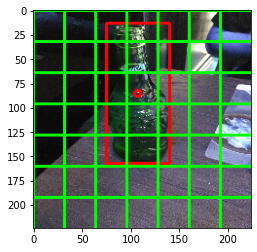

In [51]:
drawBoundingBox('batch_1/000006.jpg', output_shape, showGrid=True)

In [52]:
import json

imgAnn4_output_json = {}
for k in imgAnn4_output:
    imgAnn4_output_json[k] = imgAnn4_output[k].tolist()

json = json.dumps(imgAnn4_output_json)
f = open("imgAnn4_output_json_yolov1_224_v2.json","w")
f.write(json)
f.close()

In [ ]:
keys = list(imgAnn4_output_json.keys())

In [30]:
import random
random.shuffle(keys)
keys[:5]

['batch_2/000014.JPG',
 'batch_14/000057.jpg',
 'batch_10/000052.jpg',
 'batch_11/000007.jpg',
 'batch_13/000040.jpg']

In [31]:
num = int(len(keys)*0.8)

f = open("trainKeys.txt", "w")
for k in keys[:num]:
    f.write(k+"\n")
f.close()

f = open("testKeys.txt", "w")
for k in keys[num:]:
    f.write(k+"\n")
f.close()